# A faire

- Vérifier qu'on peut bien tracer des moyennes, et si oui, comment sont-elles calculées ? Comprendre les méthodes directes et indirectes...
- VERIFIER ABSOLUMENT la fonction de groupage

# Points sur les biostats/épidémio 

- Prévalence : cas présents ou passés / population exposée à une date donnée (image à une date t)
- Incidence : nombre de nouveaux cas de cette maladie observés sur une période donnée (vitesse d'apparition d'une maladie)
- Taux standardisés : éliminet les effets liés à des "facteurs de confusion" (âge, sexe, ...)
    - Standardisation directe : 
    - Standardisation indirect : 

# Importations

## Packages

In [2]:
import requests
import pandas as pd
import io

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Inégalités sociales face aux maladies chroniques (ER 1243)

In [3]:
url_drees = "https://data.drees.solidarites-sante.gouv.fr/explore/dataset/er_inegalites_maladies_chroniques/download/?format=csv&timezone=Europe/Berlin&lang=fr&use_labels_for_header=true&csv_separator=%3B"

urlData = requests.get(url_drees).content
df_drees = pd.read_csv(io.StringIO(urlData.decode('utf-8')), sep = ";")
df_drees.head(5)

,type,varTaux,varTauxLib,I_cat,cat,catLib,varPartition,valPartition,varGroupage,valGroupage,varPoids,poids1,poidsTot,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
0,prevalence,TOP_CVAOMI_IND,Artériopathie oblitérante du membre inférieur,0,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,13621.000499,1.374418e+06,0.009910,0.014240,0.013046,0.015435,0.014738,0.013555,0.015921
1,prevalence,TOP_CVCORON_CHR,Maladie coronaire chronique,0,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,30886.502030,1.374418e+06,0.022472,0.031912,0.030194,0.033631,0.033026,0.031317,0.034736
2,prevalence,TOP_CVVALVE_IND,Maladie valvulaire,0,SUP_CV_CAT,Maladies cardioneurovasculaires,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,6482.669891,1.374418e+06,0.004717,0.006956,0.006101,0.007810,0.007021,0.006193,0.007848
3,prevalence,TOP_IRMMHER_IND,Maladies métaboliques héréditaires ou amylose,0,SUP_INFRARVIH_CAT,Maladies inflammatoires ou rares ou VIH ou SIDA,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,2080.348333,1.374418e+06,0.001514,0.001515,0.001182,0.001847,0.001693,0.001332,0.002054
4,prevalence,TOP_NAUTRES_IND,Autres affections neurologiques,0,SUP_NEUDEG_CAT,Maladies neurologiques ou dégénératives,FISC_REG_S,76,FISC_NIVVIEM_E2015_S_moy_10,1,POIDS_FIDELI_S,4457.531100,1.374418e+06,0.003243,0.003526,0.002986,0.004066,0.003521,0.003009,0.004032


### Pour comprendre la structure de la table :

In [46]:
list(set(df_drees['type']))

['prevalence', 'incidence']

In [4]:
list(set(df_drees['varPartition']))

['SEXE', nan, 'FISC_REG_S']

In [5]:
list(set(df_drees['varGroupage']))

[nan,
 'classeAge10',
 'FISC_NIVVIEM_E2015_S_moy_10',
 'SEXE',
 'EAR_GS_S',
 'EAR_DIPLR_S']

In [6]:
df_drees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46176 entries, 0 to 46175
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               46176 non-null  object 
 1   varTaux            46176 non-null  object 
 2   varTauxLib         46176 non-null  object 
 3   I_cat              46176 non-null  int64  
 4   cat                46176 non-null  object 
 5   catLib             46176 non-null  object 
 6   varPartition       43160 non-null  object 
 7   valPartition       43160 non-null  object 
 8   varGroupage        44408 non-null  object 
 9   valGroupage        44408 non-null  object 
 10  varPoids           46176 non-null  object 
 11  poids1             46172 non-null  float64
 12  poidsTot           46172 non-null  float64
 13  txNonStand         46172 non-null  float64
 14  txStandDir         46172 non-null  float64
 15  txStandDirModBB    46172 non-null  float64
 16  txStandDirModBH    461

In [7]:
df_drees.describe()

,I_cat,poids1,poidsTot,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
count,46176.000000,4.617200e+04,4.617200e+04,46172.000000,46172.000000,46172.000000,46172.000000,45794.000000,45794.000000,45794.000000
mean,0.211538,4.084664e+04,3.306689e+06,0.015083,0.014951,0.013526,0.016377,0.014984,0.013608,0.016359
std,0.408404,1.788971e+05,5.607415e+06,0.037744,0.037236,0.035579,0.039294,0.037206,0.035653,0.039123
min,0.000000,0.000000e+00,4.365972e+02,0.000000,0.000000,-0.046276,0.000000,0.000000,-0.057530,0.000000
25%,0.000000,3.513649e+02,3.640001e+05,0.000570,0.000576,0.000209,0.000841,0.000598,0.000244,0.000869
50%,0.000000,2.614705e+03,9.753148e+05,0.002697,0.002720,0.001930,0.003485,0.002767,0.001986,0.003504
75%,0.000000,1.636898e+04,3.640875e+06,0.011545,0.011624,0.009733,0.013296,0.011734,0.009851,0.013414
max,1.000000,6.070514e+06,4.773171e+07,0.588601,0.588512,0.580976,0.678644,0.590223,0.580827,0.708820


/tmp/ipykernel_141/38895151.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = sous_df.groupby(groupby, as_index = False).mean()
/tmp/ipykernel_141/38895151.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = sous_df.groupby(groupby, as_index = False).mean()


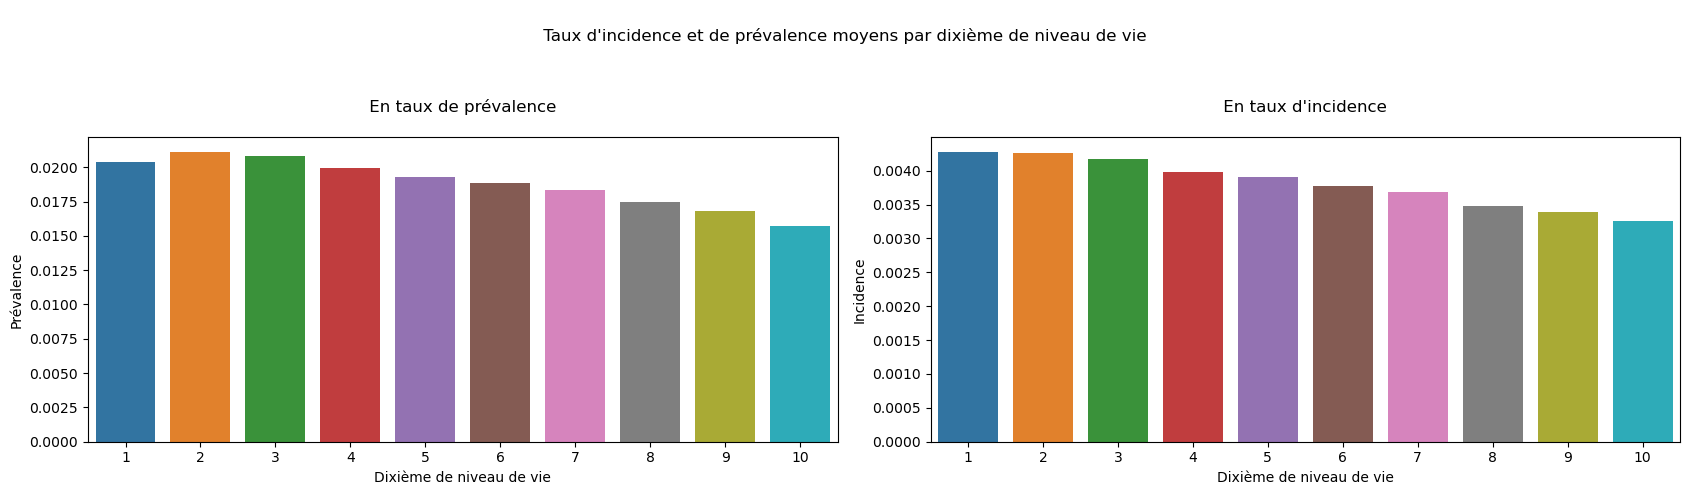

In [81]:
### Pour tracer quelques barplots

def selection_variable_barplot(liste_var_groupage, liste_var_partition, type_var_groupage = float, type_var_partition = float, groupby = 'valGroupage', type_donnees = 'prevalence') :
    # On commence par ne sélectionner que les variables qu'on souhaite
    sous_df = df_drees[df_drees['type'] == type_donnees].copy()
    sous_df = sous_df[(sous_df['varGroupage'].isin(liste_var_groupage))
                           &(sous_df['varPartition'].isin(liste_var_partition))
                           ].copy()
    # On vérifie les types
    sous_df = sous_df.astype({'valPartition' : type_var_partition, 'valGroupage' : type_var_groupage},  errors='ignore')
    
    # On fait le groupby + l'opération voulue
    grouped_df = sous_df.groupby(groupby, as_index = False).mean()
    grouped_df = grouped_df.sort_values(by = groupby)
    
    return grouped_df

### Exemples 

# Le taux d'incidence moyen par dixième de niveau de vie

fig, axes = plt.subplots(1, 2, figsize = (17,5))

ax = axes[0]
df_loc = selection_variable_barplot(liste_var_groupage = ['FISC_NIVVIEM_E2015_S_moy_10'],
                                    liste_var_partition = ['FISC_REG_S'],
                                    type_var_groupage = int,
                                    type_var_partition = float,
                                    groupby = 'valGroupage',
                                    type_donnees = 'prevalence'
                                   )

sns.barplot(data=df_loc, x= "valGroupage" , y="txStandDir", ax = ax)
ax.set_title('\n En taux de prévalence \n')
ax.set_xlabel('Dixième de niveau de vie')
ax.set_ylabel('Prévalence')



ax = axes[1]
df_loc = selection_variable_barplot(liste_var_groupage = ['FISC_NIVVIEM_E2015_S_moy_10'],
                                    liste_var_partition = ['FISC_REG_S'],
                                    type_var_groupage = int,
                                    type_var_partition = float,
                                    groupby = 'valGroupage',
                                    type_donnees = 'incidence'
                                   )

sns.barplot(data=df_loc, x= "valGroupage" , y="txStandDir", ax = ax)
ax.set_title('\n En taux d\'incidence \n')
ax.set_xlabel('Dixième de niveau de vie')
ax.set_ylabel('Incidence')


fig.suptitle('\n Taux d\'incidence et de prévalence moyens par dixième de niveau de vie \n')
fig.tight_layout()

# sns.despine()
plt.show()

In [49]:
dico_grpes_sociopro = {
    '1' : 'Agriculteurs exploitants',
    '2' : 'Artisans, commerçants, chefs d\'entreprise',
    '3' : 'Cadres et professions intellectuelles supérieures',
    '4' : 'Professions intermédiaires',
    '5' : 'Employés',
    '6' : 'Ouvriers',
    '7' : 'Retraités',
    '8' : 'Autres'
}

/tmp/ipykernel_141/1957804818.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = sous_df.groupby(groupby, as_index = False).mean()


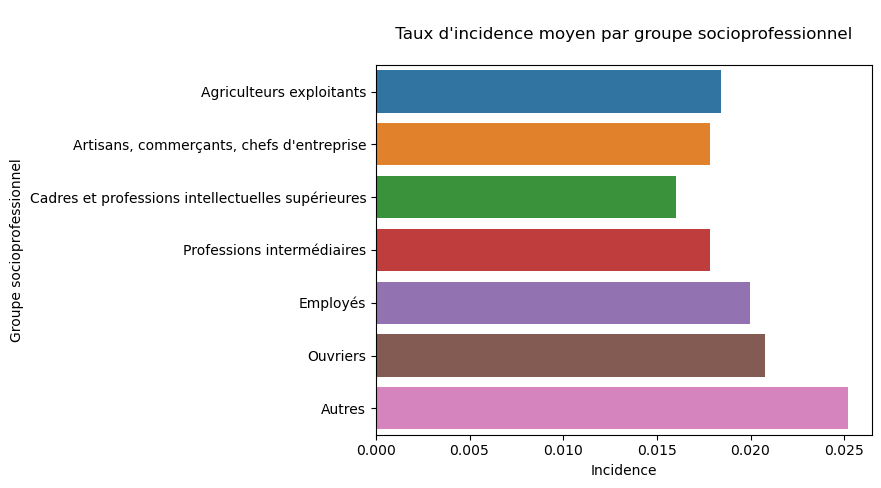

In [50]:
# Le taux d'incidence moyen par groupe socioprofessionnel

df_loc = selection_variable_barplot(liste_var_groupage = ['EAR_GS_S'],
                                    liste_var_partition = ['SEXE'],
                                    type_var_groupage = str,
                                    type_var_partition = float,
                                    groupby = 'valGroupage'
                                   )
df_loc.replace({'valGroupage' : dico_grpes_sociopro}, inplace=True)

# plt.figure(figsize=(10,4))
sns.barplot(data=df_loc, y="valGroupage" , x="txStandDir")
plt.title('\n Taux d\'incidence moyen par groupe socioprofessionnel \n')
plt.ylabel('Groupe socioprofessionnel')
plt.xlabel('Incidence')

# plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='small')

plt.show()

/tmp/ipykernel_141/1957804818.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = sous_df.groupby(groupby, as_index = False).mean()


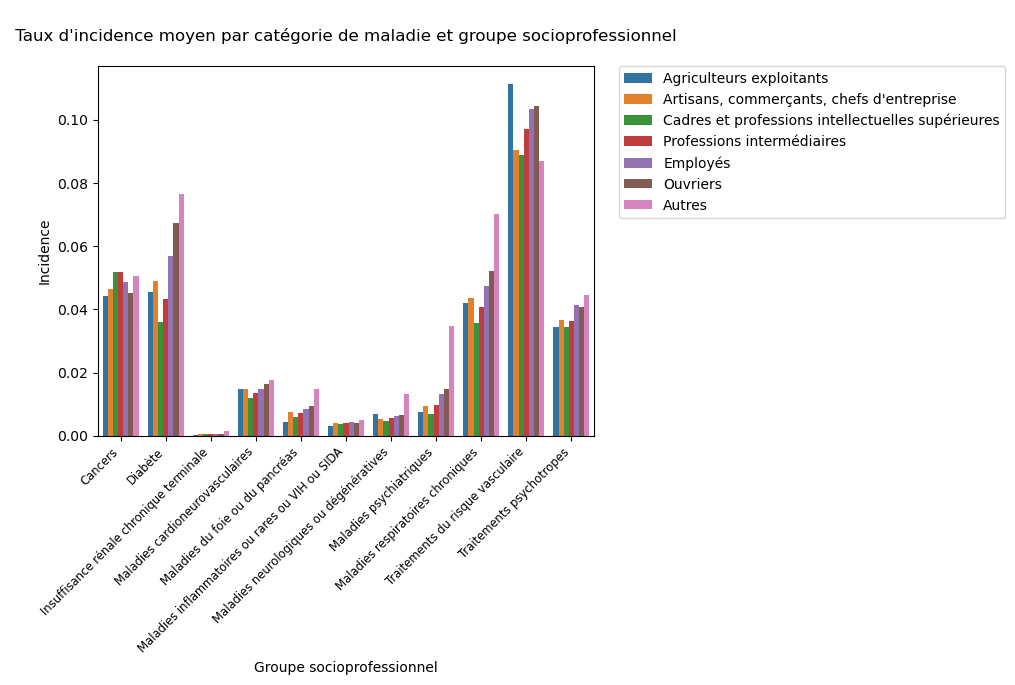

In [51]:
# Comparaison des taux d'incidence moyen par maladie groupe socioprofessionnel

df_loc = selection_variable_barplot(liste_var_groupage = ['EAR_GS_S'],
                                    liste_var_partition = ['SEXE'],
                                    type_var_groupage = str,
                                    type_var_partition = float,
                                    groupby = ['valGroupage', 'catLib']
                                   )
df_loc.replace({'valGroupage' : dico_grpes_sociopro}, inplace=True)

# col = ['Maladies psychiatriques','Diabète','Maladies neurologiques ou dégénératives', 'Maladies du foie ou du pancréas']
# df_loc[df_loc['catLib'].isin(col)]
   
sns.barplot(data=df_loc, x='catLib' , y='txStandDir', hue='valGroupage')
plt.title('\n Taux d\'incidence moyen par catégorie de maladie et groupe socioprofessionnel \n')
plt.xlabel('Groupe socioprofessionnel')
plt.ylabel('Incidence')

plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

 
plt.show()

Un peu moche, peut être représenter seulement les plus fortes disparités? diabete, maladies psy... (mais ordres de grandeur différents donc pas très parlant)

/tmp/ipykernel_141/1957804818.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = sous_df.groupby(groupby, as_index = False).mean()


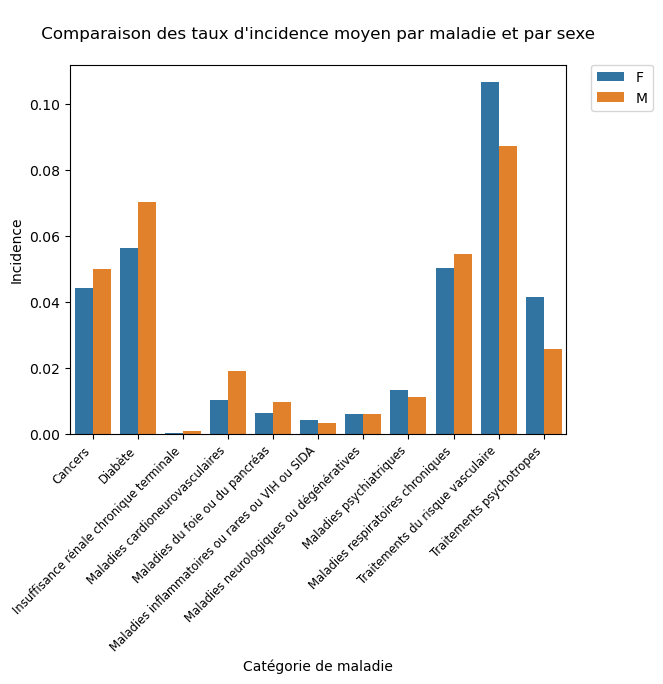

In [52]:
# Comparaison des taux d'incidence moyen par maladie et par sexe

df_loc = selection_variable_barplot(liste_var_groupage = ['SEXE'],
                                    liste_var_partition = ['FISC_REG_S'],
                                    type_var_groupage = float,
                                    type_var_partition = int,
                                    groupby = ['catLib','valGroupage']
                                   )


sns.barplot(data=df_loc, x='catLib' , y='txStandDir', hue='valGroupage')
plt.title('\n Comparaison des taux d\'incidence moyen par maladie et par sexe \n')
plt.xlabel('Catégorie de maladie')
plt.ylabel('Incidence')

plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='small')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

 
plt.show()

In [53]:
# Comparaison des taux d'incidence moyen par maladie groupe socioprofessionnel

df_loc = selection_variable_barplot(liste_var_groupage = ['FISC_NIVVIEM_E2015_S_moy_10',' EAR_GS_S'],
                                    liste_var_partition = ['SEXE'],
                                    type_var_groupage = str,
                                    type_var_partition = float,
                                    groupby = ['valGroupage', 'catLib']
                                   )

df_loc
# df_loc.replace({'valGroupage' : dico_grpes_sociopro}, inplace=True)

# # col = ['Maladies psychiatriques','Diabète','Maladies neurologiques ou dégénératives', 'Maladies du foie ou du pancréas']
# # df_loc[df_loc['catLib'].isin(col)]
   
# sns.barplot(data=df_loc, x='catLib' , y='txStandDir', hue='valGroupage')
# plt.title('\n Taux d\'incidence moyen par catégorie de maladie et groupe socioprofessionnel \n')
# plt.xlabel('Groupe socioprofessionnel')
# plt.ylabel('Incidence')

# plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='small')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

 
# plt.show()

/tmp/ipykernel_141/1957804818.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = sous_df.groupby(groupby, as_index = False).mean()


,valGroupage,catLib,I_cat,poids1,poidsTot,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
0,1,Cancers,1.000000,198813.208949,7.096521e+06,0.027928,0.039740,0.038896,0.040584,0.040364,0.039534,0.041194
1,1,Diabète,1.000000,401070.117950,7.096521e+06,0.056599,0.078455,0.077343,0.079568,0.081134,0.080013,0.082256
2,1,Insuffisance rénale chronique terminale,0.250000,5671.153180,7.096521e+06,0.000807,0.001060,0.000936,0.001184,0.001100,0.000976,0.001223
3,1,Maladies cardioneurovasculaires,0.083333,74637.775951,7.096521e+06,0.010588,0.015922,0.015461,0.016384,0.016359,0.015899,0.016819
4,1,Maladies du foie ou du pancréas,1.000000,76857.693691,7.096521e+06,0.010929,0.012957,0.012501,0.013412,0.013618,0.013159,0.014077
...,...,...,...,...,...,...,...,...,...,...,...,...
105,9,Maladies neurologiques ou dégénératives,0.125000,36353.374245,6.567620e+06,0.005528,0.005333,0.005108,0.005559,0.005283,0.005064,0.005503
106,9,Maladies psychiatriques,0.142857,57140.072910,6.567620e+06,0.008679,0.008111,0.007835,0.008388,0.008008,0.007744,0.008272
107,9,Maladies respiratoires chroniques,1.000000,303744.668230,6.567620e+06,0.046261,0.043988,0.043208,0.044767,0.043455,0.042716,0.044195
108,9,Traitements du risque vasculaire,0.333333,777008.717447,6.567620e+06,0.118212,0.099376,0.098457,0.100295,0.099661,0.098752,0.100569


In [54]:
df_loc.groupby('catLib').std().sort_values('txStandIndir')

/tmp/ipykernel_141/1286450221.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_loc.groupby('catLib').std().sort_values('txStandIndir')


,I_cat,poids1,poidsTot,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
catLib,,,,,,,,,,
Insuffisance rénale chronique terminale,0.0,972.583253,167090.623421,0.000143,0.000235,0.000215,0.000256,0.000238,0.000217,0.000258
Maladies inflammatoires ou rares ou VIH ou SIDA,0.0,1375.145337,167090.623421,0.000264,0.000344,0.000332,0.000355,0.000336,0.000322,0.000349
Maladies neurologiques ou dégénératives,0.0,6444.533115,167090.623421,0.000966,0.000960,0.000933,0.000988,0.000969,0.000942,0.000996
Maladies cardioneurovasculaires,0.0,11756.063015,167090.623421,0.002017,0.001912,0.001873,0.001952,0.001912,0.001872,0.001953
Maladies du foie ou du pancréas,0.0,12611.681926,167090.623421,0.001798,0.002784,0.002711,0.002856,0.002864,0.002791,0.002936
Cancers,0.0,61016.028269,167090.623421,0.010006,0.003375,0.003406,0.003344,0.003149,0.003180,0.003119
Traitements psychotropes,0.0,19710.708306,167090.623421,0.003464,0.003434,0.003392,0.003477,0.003440,0.003391,0.003489
Maladies psychiatriques,0.0,29546.728009,167090.623421,0.004223,0.005134,0.005049,0.005218,0.005069,0.004987,0.005152
Traitements du risque vasculaire,0.0,109153.733816,167090.623421,0.018269,0.007055,0.007067,0.007042,0.006484,0.006495,0.006473


/tmp/ipykernel_141/1957804818.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = sous_df.groupby(groupby, as_index = False).mean()


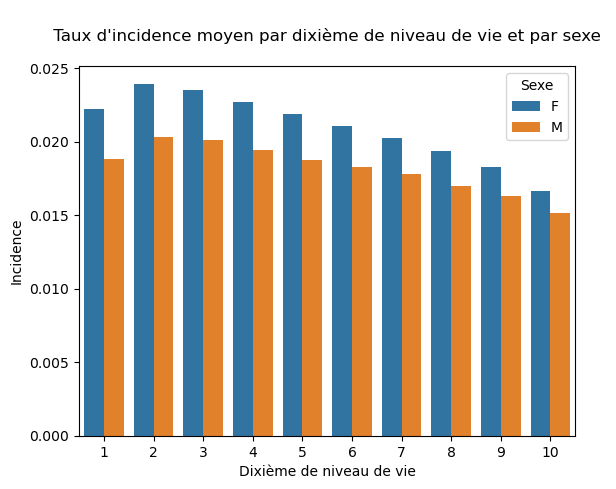

In [55]:
# On ventile par sexe

df_loc = selection_variable_barplot(liste_var_groupage = ['FISC_NIVVIEM_E2015_S_moy_10'],
                                    liste_var_partition = ['SEXE'],
                                    type_var_groupage = int,
                                    type_var_partition = float,
                                    groupby = ['valGroupage', 'valPartition']
                                   )


df_loc = df_loc.rename(columns = {'valPartition' : 'Sexe'})
sns.barplot(data=df_loc, x= "valGroupage", y="txStandDir", hue = 'Sexe')
plt.title('\n Taux d\'incidence moyen par dixième de niveau de vie et par sexe \n')
plt.xlabel('Dixième de niveau de vie')
plt.ylabel('Incidence')
# sns.despine()
plt.show()

# Brouillon : on essaie de faire une carte !

In [56]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [57]:
import geopandas as gpd
!pip install contextily
import contextily as ctx

In [58]:
import geopandas as gpd
# Pour télécharger le fond de carte : https://github.com/gregoiredavid/france-geojson/blob/master/regions-version-simplifiee.geojson'
# A voir si on peut le push sur git, et si on ne peut pas le télécharger automatiquement à chaque fois...

sf = gpd.read_file('regions-version-simplifiee.geojson')
sf

,code,nom,geometry
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.63327 49.10838, ..."
1,24,Centre-Val de Loire,"POLYGON ((2.87463 47.52042, 2.88845 47.50943, ..."
2,27,Bourgogne-Franche-Comté,"POLYGON ((3.62942 46.74946, 3.57569 46.74952, ..."
3,28,Normandie,"POLYGON ((-1.11962 49.35557, -1.07822 49.38849..."
4,32,Hauts-de-France,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ..."
5,44,Grand Est,"POLYGON ((4.23316 49.95775, 4.30810 49.96952, ..."
6,52,Pays de la Loire,"MULTIPOLYGON (((-2.45849 47.44812, -2.45343 47..."
7,53,Bretagne,"MULTIPOLYGON (((-3.65914 48.65921, -3.63649 48..."
8,75,Nouvelle-Aquitaine,"MULTIPOLYGON (((1.41519 46.34722, 1.43538 46.3..."
9,76,Occitanie,"MULTIPOLYGON (((1.78613 42.57362, 1.77316 42.5..."


Tout d'abord la carte de France et des régions


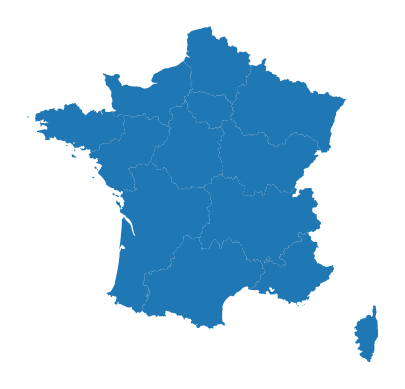

In [59]:
ax = sf.plot()
ax.set_axis_off()
print("Tout d'abord la carte de France et des régions")

In [60]:
df_par_region = selection_variable_barplot(
                        liste_var_groupage = ['FISC_NIVVIEM_E2015_S_moy_10'],
                        liste_var_partition = ['FISC_REG_S'],
                        type_var_groupage = int,
                        type_var_partition = object,
                        groupby = 'valPartition'
                        )

# df_par_region = df_par_region.rename(columns = {'valPartition' : 'code'})

df_merged_par_region = sf.copy().merge(df_par_region, left_on = 'code', right_on = 'valPartition', left_index=False, right_index=False, how = 'left')

/tmp/ipykernel_141/1957804818.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = sous_df.groupby(groupby, as_index = False).mean()


In [61]:
df_par_region.head()

,valPartition,I_cat,valGroupage,poids1,poidsTot,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
0,1,0.211538,5.5,1239.546731,7.828074e+04,0.015929,0.015580,0.012283,0.018877,0.015552,0.012343,0.018761
1,11,0.211538,5.5,38432.480572,2.425662e+06,0.015763,0.016237,0.015606,0.016869,0.016277,0.015653,0.016900
2,2,0.211538,5.5,1198.414894,7.479923e+04,0.016186,0.015786,0.012471,0.019101,0.016131,0.012822,0.019439
3,24,0.211538,5.5,10695.713842,5.149689e+05,0.020782,0.020880,0.019433,0.022327,0.020871,0.019466,0.022277
4,27,0.211538,5.5,12084.301263,5.624879e+05,0.021399,0.021515,0.020121,0.022909,0.021467,0.020110,0.022825


In [62]:
df_merged_par_region.head()

,code,nom,geometry,valPartition,I_cat,valGroupage,poids1,poidsTot,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH
0,11,Île-de-France,"POLYGON ((2.59052 49.07965, 2.63327 49.10838, ...",11,0.211538,5.5,38432.480572,2.425662e+06,0.015763,0.016237,0.015606,0.016869,0.016277,0.015653,0.016900
1,24,Centre-Val de Loire,"POLYGON ((2.87463 47.52042, 2.88845 47.50943, ...",24,0.211538,5.5,10695.713842,5.149689e+05,0.020782,0.020880,0.019433,0.022327,0.020871,0.019466,0.022277
2,27,Bourgogne-Franche-Comté,"POLYGON ((3.62942 46.74946, 3.57569 46.74952, ...",27,0.211538,5.5,12084.301263,5.624879e+05,0.021399,0.021515,0.020121,0.022909,0.021467,0.020110,0.022825
3,28,Normandie,"POLYGON ((-1.11962 49.35557, -1.07822 49.38849...",28,0.211538,5.5,14508.882894,6.660110e+05,0.021767,0.021814,0.020514,0.023113,0.021770,0.020512,0.023027
4,32,Hauts-de-France,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ...",32,0.211538,5.5,25415.962330,1.199960e+06,0.021219,0.020913,0.019973,0.021852,0.020948,0.020034,0.021863


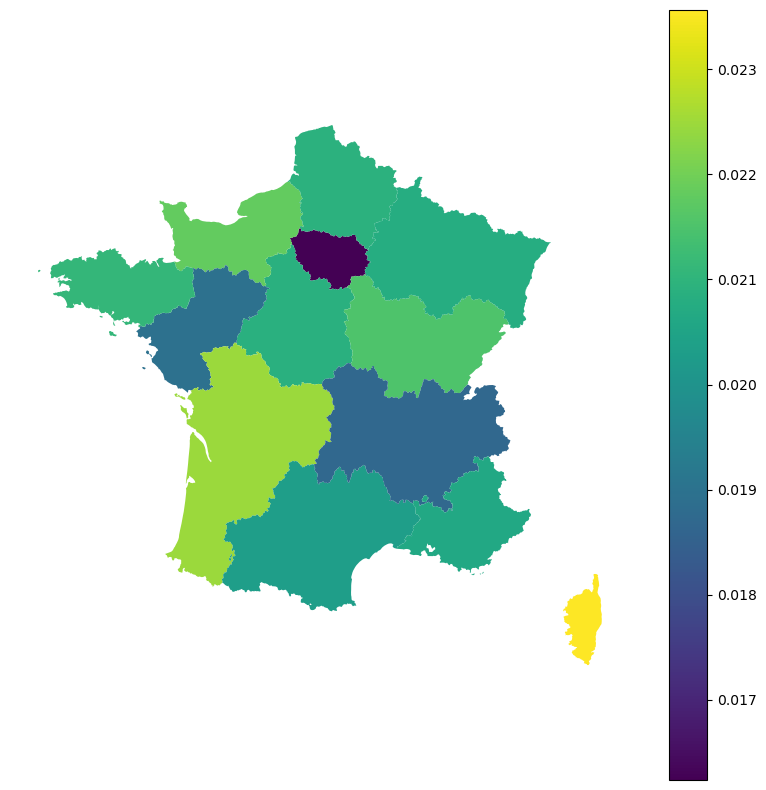

In [63]:
fig,ax = plt.subplots(figsize=(10, 10))
df_merged_par_region.plot(ax = ax, column = "txStandDir", legend=True)
ax.set_axis_off()
ax
plt.show()

### On rajoute les noms de régions

/tmp/ipykernel_141/525728170.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_merged_par_region["centre_regions"] = df_merged_par_region.centroid


<AxesSubplot: >

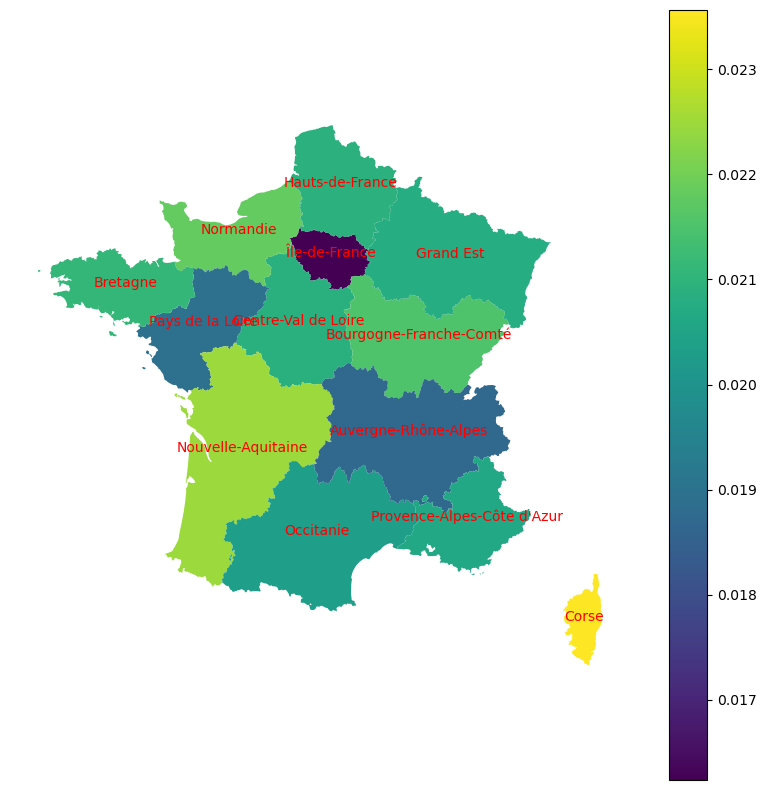

In [64]:
df_merged_par_region["centre_regions"] = df_merged_par_region.centroid


fig,ax = plt.subplots(figsize=(10, 10))
df_merged_par_region.plot(ax = ax, column = "txStandDir", legend=True)

for num_ligne in range(len(df_merged_par_region)) :
    ligne = df_merged_par_region.iloc[num_ligne]
    x = ligne['centre_regions'].x
    y = ligne['centre_regions'].y
    ax.annotate(ligne["nom"], xy = (x, y), xytext = (0, 0), textcoords="offset points", ha='center', color='red')

ax.set_axis_off()
ax

# for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities.name):
#     ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

/tmp/ipykernel_141/1957804818.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = sous_df.groupby(groupby, as_index = False).mean()
/tmp/ipykernel_141/692508962.py:16: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_merged_par_region_diabete["centre_regions"] = df_merged_par_region_diabete.centroid


<AxesSubplot: >

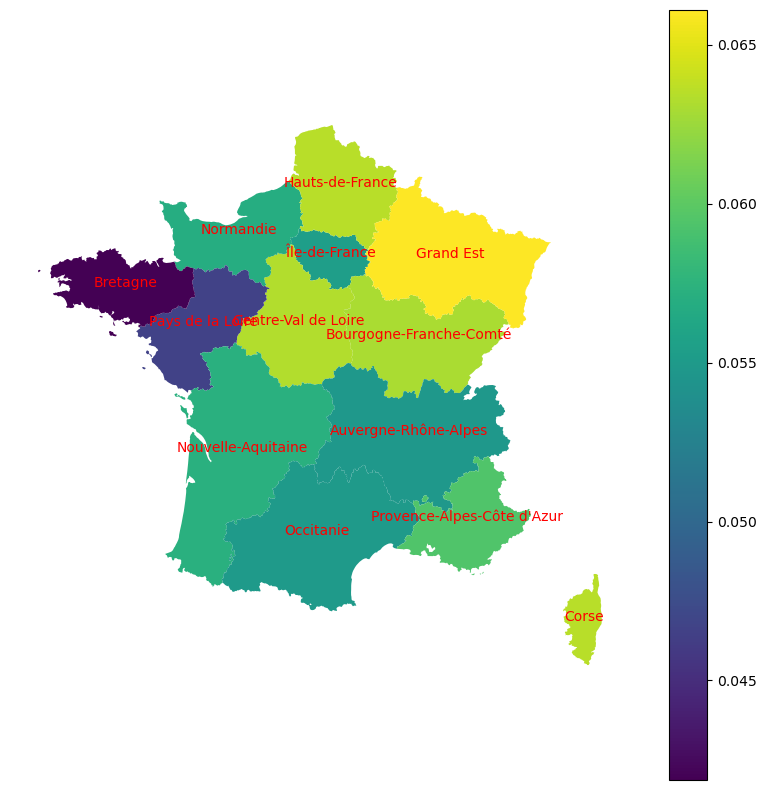

In [65]:
df_par_region = selection_variable_barplot(
                        liste_var_groupage = ['FISC_NIVVIEM_E2015_S_moy_10'],
                        liste_var_partition = ['FISC_REG_S'],
                        type_var_groupage = int,
                        type_var_partition = object,
                        groupby = ['valPartition', 'catLib']
                        )

# df_par_region = df_par_region.rename(columns = {'valPartition' : 'code'})

df_par_region_diabete = df_par_region[df_par_region['catLib'] == 'Diabète']


df_merged_par_region_diabete = sf.copy().merge(df_par_region_diabete, left_on = 'code', right_on = 'valPartition', left_index=False, right_index=False, how = 'left')

df_merged_par_region_diabete["centre_regions"] = df_merged_par_region_diabete.centroid


fig,ax = plt.subplots(figsize=(10, 10))
df_merged_par_region_diabete.plot(ax = ax, column = "txStandDir", legend=True)

for num_ligne in range(len(df_merged_par_region)) :
    ligne = df_merged_par_region_diabete.iloc[num_ligne]
    x = ligne['centre_regions'].x
    y = ligne['centre_regions'].y
    ax.annotate(ligne["nom"], xy = (x, y), xytext = (0, 0), textcoords="offset points", ha='center', color='red')

ax.set_axis_off()
ax

# for x, y, label in zip(cities.geometry.x, cities.geometry.y, cities.name):
#     ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

In [34]:
Diabète

NameError: name 'Diabète' is not defined

# Brouillon là-dessous

In [43]:
import cartiflette.s3

shp_communes = cartiflette.s3.download_vectorfile_url_all(
    values = ["75", "92", "93", "94"],
    level="COMMUNE",
    vectorfile_format="geojson",
    decoupage="departement",
    year=2022)

shp_communes.head()

ax = shp_communes.plot()
ax.set_axis_off()

ModuleNotFoundError: No module named 'cartiflette'

In [99]:
import geopandas as gpd
!pip install contextily
import contextily as ctx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 14.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 kB 18.6 MB/s eta 0:00:00


In [117]:
!pip install geoviews

In [116]:
pip install typing-extensions --upgrade

Note: you may need to restart the kernel to use updated packages.


In [119]:
conda install -c pyviz hvplot

Solving environment: \ ^C
failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.


In [118]:
import geoviews as gv
import geoviews.feature as gf
import xarray as xr
from cartopy import crs

gv.extension('bokeh')

ImportError: cannot import name 'TypeGuard' from 'typing_extensions' (/opt/mamba/lib/python3.9/site-packages/typing_extensions.py)

In [108]:
pip install pygal_maps_fr


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.6/412.6 kB 9.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 28.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [110]:
import pygal

fr_chart = pygal.maps.fr.Departments()
fr_chart.title = 'Some departments'
fr_chart.add('Métropole', ['69', '92', '13'])
fr_chart.add('Corse', ['2A', '2B'])
fr_chart.add('DOM COM', ['971', '972', '973', '974'])
fr_chart.render()

AttributeError: module 'pygal.maps' has no attribute 'fr'

In [111]:
from pygal.maps.fr import aggregate_regions
fr_chart = pygal.maps.fr.Regions(human_readable=True)
fr_chart.title = 'Population by region'
fr_chart.add('In 2011', aggregate_regions({
  '01': 603827, '02': 541302, '03': 342729, '04': 160959, '05': 138605, '06': 1081244, '07': 317277, '08': 283110, '09': 152286, '10': 303997, '11': 359967, '12': 275813, '13': 1975896, '14': 685262, '15': 147577, '16': 352705, '17': 625682, '18': 311694, '19': 242454, '2A': 145846, '2B': 168640, '21': 525931, '22': 594375, '23': 122560, '24': 415168, '25': 529103, '26': 487993, '27': 588111, '28': 430416, '29': 899870, '30': 718357, '31': 1260226, '32': 188893, '33': 1463662, '34': 1062036, '35': 996439, '36': 230175, '37': 593683, '38': 1215212, '39': 261294, '40': 387929, '41': 331280, '42': 749053, '43': 224907, '44': 1296364, '45': 659587, '46': 174754, '47': 330866, '48': 77156, '49': 790343, '50': 499531, '51': 566571, '52': 182375, '53': 307031, '54': 733124, '55': 193557, '56': 727083, '57': 1045146, '58': 218341, '59': 2579208, '60': 805642, '61': 290891, '62': 1462807, '63': 635469, '64': 656608, '65': 229228, '66': 452530, '67': 1099269, '68': 753056, '69': 1744236, '70': 239695, '71': 555999, '72': 565718, '73': 418949, '74': 746994, '75': 2249975, '76': 1251282, '77': 1338427, '78': 1413635, '79': 370939, '80': 571211, '81': 377675, '82': 244545, '83': 1012735, '84': 546630, '85': 641657, '86': 428447, '87': 376058, '88': 378830, '89': 342463, '90': 143348, '91': 1225191, '92': 1581628, '93': 1529928, '94': 1333702, '95': 1180365, '971': 404635, '972': 392291, '973': 237549, '974': 828581, '976': 212645
}))
fr_chart.render()

ModuleNotFoundError: No module named 'pygal.maps.fr'

In [112]:
worldmap_chart = pygal.maps.world.World()
worldmap_chart.title = 'Some countries'
worldmap_chart.add('F countries', ['fr', 'fi'])
worldmap_chart.add('M countries', ['ma', 'mc', 'md', 'me', 'mg',
                                   'mk', 'ml', 'mm', 'mn', 'mo',
                                   'mr', 'mt', 'mu', 'mv', 'mw',
                                   'mx', 'my', 'mz'])
worldmap_chart.add('U countries', ['ua', 'ug', 'us', 'uy', 'uz'])
worldmap_chart.render()

AttributeError: module 'pygal.maps' has no attribute 'World'

#### Dictionnaire code régions

In [3]:
dico_regions = {
    '1' : 'Guadeloupe',
    '2' : 'Martinique',
    '3' : 'Guyane',
    '4' : 'La Réunion',
    '6' : 'Mayotte',
    '11' : 'Ile de France',
    '24' : 'Centre val de Loire',
    '27' : 'Bourgogne Franche-Comté',
    '28' : 'Normandie' ,
    '32' : 'Nord pas de Calais Picardie',
    '44' : 'Alsace Champagne Ardenne Lorraine',
    '52' : 'Pays de la Loire',
    '53' : 'bretagne' ,
    '75' : 'Aquitaine Limousin Poitou-Charentes',
    '76' : 'Langeudoc-Roussillon Midi-Pyrénées' ,
    '84' : 'Auvergne Rhône-Alpes' ,
    '93' : 'Procence Alpes Côte d\'Azur' ,
    '94' : 'Corse'
}

#### Dictionnaire code groupes socioprofessionnels

In [74]:
dico_grpes_sociopro = {
    '1' : 'Agriculteurs exploitants',
    '2' : 'Artisans, commerçants, chefs d\'entreprise',
    '3' : 'Cadres et professions intellectuelles supérieures',
    '4' : 'Professions intermédiaires',
    '5' : 'Employés',
    '6' : 'Ouvriers',
    '7' : 'Retraités',
    '8' : 'Autres'
}

In [4]:
set(rawData['valGroupage'])

{'1',
 '10',
 '2',
 '3',
 '30-39',
 '4',
 '40-49',
 '5',
 '50-59',
 '6',
 '60-69',
 '7',
 '70-79',
 '8',
 '80-89',
 '9',
 '<30',
 '>=90',
 'F',
 'M',
 nan}

In [46]:
def find_nb_modalities(df):
    for col in df.columns:
        if df[col].dtype == 'O':
            print(f'La colonne {col} contient {df[col].nunique()} modalités.')

find_nb_modalities(df_drees)

La colonne type contient 2 modalités.
La colonne varTaux contient 52 modalités.
La colonne varTauxLib contient 52 modalités.
La colonne cat contient 11 modalités.
La colonne catLib contient 11 modalités.
La colonne varPartition contient 2 modalités.
La colonne valPartition contient 19 modalités.
La colonne varGroupage contient 5 modalités.
La colonne valGroupage contient 20 modalités.
La colonne varPoids contient 2 modalités.


In [47]:
def missing_rate(df, substitute='nan'):
    for col in df.columns:
        rate = df[col].isna().sum()/len(df)*100
        if rate != 0:
            print(f'Le taux de NAs de la colonne {col} est {round(rate,2)}%.')

missing_rate(df_drees)

Le taux de NAs de la colonne varPartition est 6.53%.
Le taux de NAs de la colonne valPartition est 6.53%.
Le taux de NAs de la colonne varGroupage est 3.83%.
Le taux de NAs de la colonne valGroupage est 3.83%.
Le taux de NAs de la colonne poids1 est 0.01%.
Le taux de NAs de la colonne poidsTot est 0.01%.
Le taux de NAs de la colonne txNonStand est 0.01%.
Le taux de NAs de la colonne txStandDir est 0.01%.
Le taux de NAs de la colonne txStandDirModBB est 0.01%.
Le taux de NAs de la colonne txStandDirModBH est 0.01%.
Le taux de NAs de la colonne txStandIndir est 0.83%.
Le taux de NAs de la colonne txStandIndirModBB est 0.83%.
Le taux de NAs de la colonne txStandIndirModBH est 0.83%.


In [68]:
df_drees[df_drees['varGroupage']=='EAR_GS_S'].valGroupage.unique()
df_drees['valGroupage'].unique()
df_drees[df_drees['valGroupage']=='7']
df_drees[(df_drees['valGroupage']=='7') & (df_drees['varGroupage']=='EAR_GS_S')]
# pas de groupe socioprofessionnel 7 ? (retraités)

,type,varTaux,varTauxLib,I_cat,cat,catLib,varPartition,valPartition,varGroupage,valGroupage,varPoids,poids1,poidsTot,txNonStand,txStandDir,txStandDirModBB,txStandDirModBH,txStandIndir,txStandIndirModBB,txStandIndirModBH


In [ ]:
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2)

#create boxplot in each subplot
sns.boxplot(data=df, x='team', y='points', ax=axes[0,0])
sns.boxplot(data=df, x='team', y='assists', ax=axes[0,1])
sns.boxplot(data=df, x='team', y='rebounds', ax=axes[1,0])
sns.boxplot(data=df, x='team', y='blocks', ax=axes[1,1])